# Inheritance

Inheritance is one of the core concepts of object-oriented programming. It allows one object to take on the properties and methods of another, making it easier to reuse code across different parts of an application.

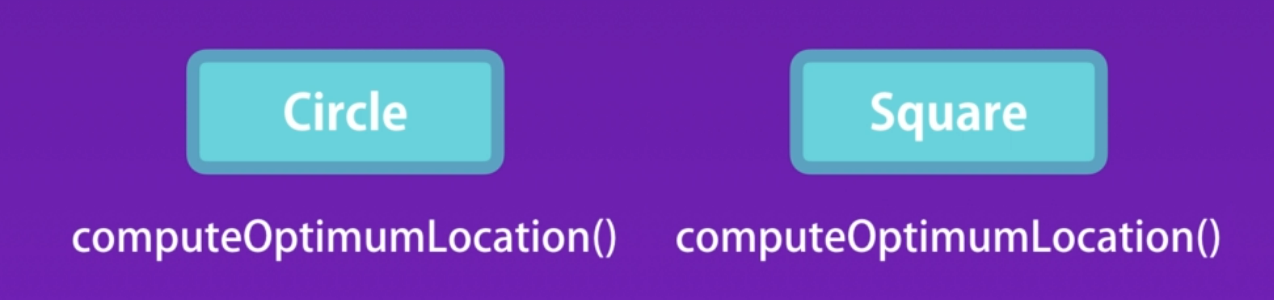

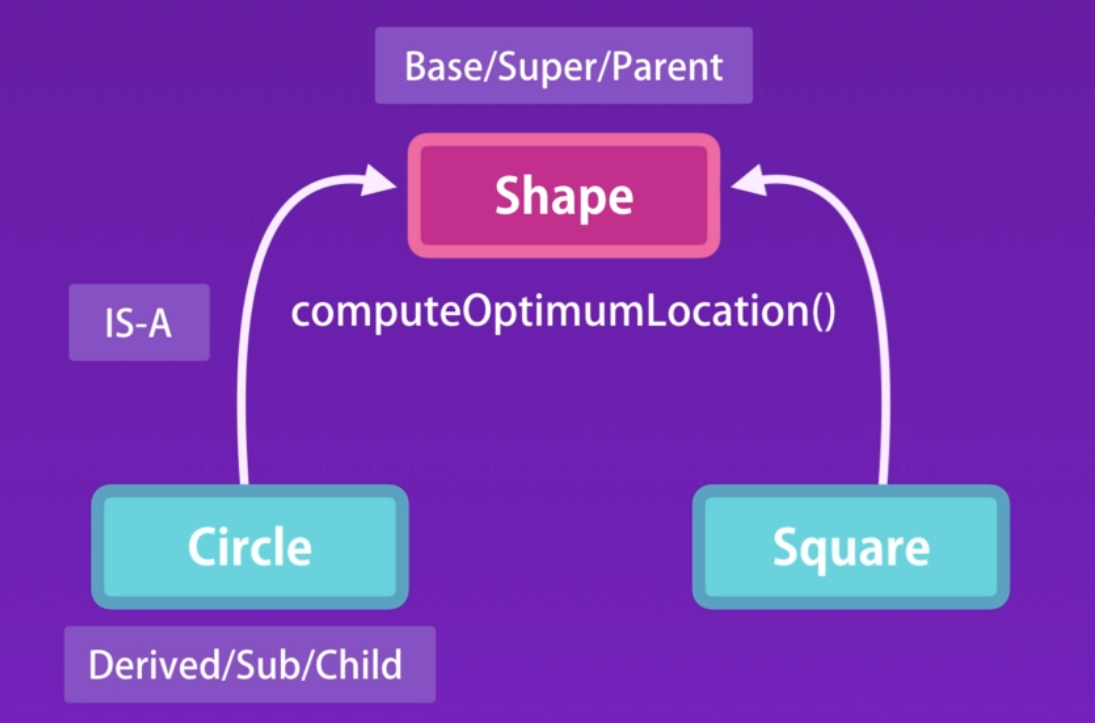

In above example, all circle, squre and shapes are classes. But this is `Classical Inheritance`.

In JavaScript, unlike classical languages such as Java or C#, we don't originally have traditional classes — everything is based on objects. This is where **prototypal inheritance** comes into play.

Essentially, there are two types of inheritance:

1. **Classical Inheritance** – Common in class-based languages where one class inherits from another.

2. **Prototypal Inheritance** – Used in JavaScript, where objects inherit directly from other objects via the prototype chain.

With prototypal inheritance, JavaScript provides a flexible and dynamic way to share behavior across objects without needing formal classes (though ES6 introduced class syntax, it is still based on prototypes under the hood).



# Prototypes and Prototypical Inheritance

In JavaScript, we have to implement inheritance **only using objects**.

In JavaScript, we refer to the parent of another object as its **prototype**. So **prototype** basically means a **parent**.

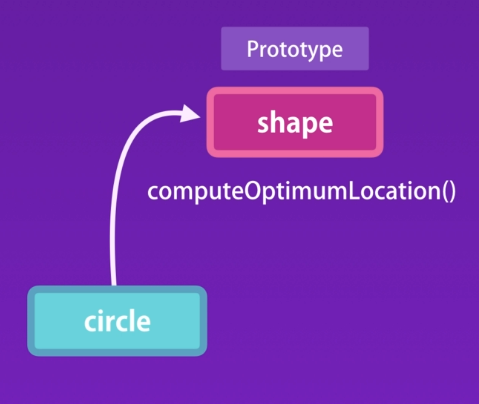

Every object in JavaScript has a prototype, except **one**.

In Java (a class-based language), every class has a parent, which is the `Object class`. Likewise, in JavaScript too, there is a parent object for every object. (There is no specific name for this top object, but for now, let’s call it `ObjectBase`, `__proto__`.)

Every object in JavaScript directly or indirectly inherits from this ObjectBase. For example, the toString() method is defined in the ObjectBase.

### Prototypical Inheritance.

When we access a property or a method on an object in JavaScript, it works like this:

- First, JavaScript looks for that property or method on the **object itself**.

- If it can’t find it, then it looks at the **prototype (parent)** of that object.

- Again, if it can’t find the member there, it will look at the **prototype of that prototype**, all the way up the chain until it reaches the root object, which we called `ObjectBase`.

#### So, as a Summary:

- A **prototype** is just a regular object in memory. There’s nothing special about it.

- **Every object has a prototype or parent**, except the root object (ObjectBase).

- This whole chain of objects is called the **prototype chain**.

# Multi-level Inheritance

Multi-Level Inheritance is when a class or object inherits from a parent, and that parent itself inherits from another parent — forming a chain of inheritance.

Note -

Objects created by given constructor will have the same prototype.

ex -> All Circle objects created by the circle constructor will have the same the same prototype, and similarly, all arrays created by array constructor will hace the same prototype.

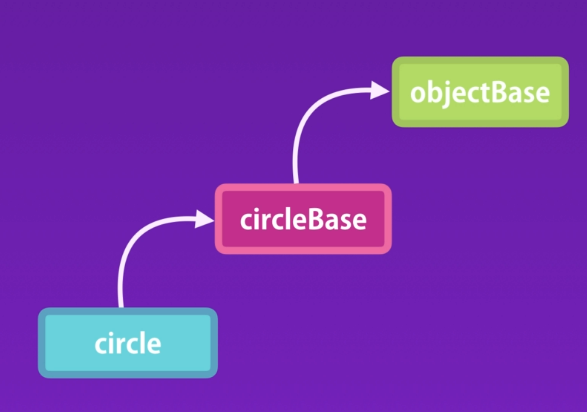

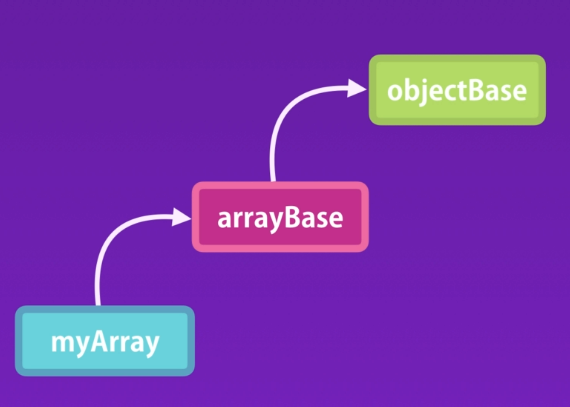


------------

#### Explanation 

In JavaScript, when you create objects using a constructor function, those objects automatically get linked to the **prototype** of that constructor.

That means

> All objects created using the same constructor **share the same prototype**.

##### ✅ Example: Circle Constructor

```javascript
function Circle(radius) {
  this.radius = radius;
}

const circle1 = new Circle(5);
const circle2 = new Circle(10);
```

`circle1` and `circle2` are different objects, but they both point to the same prototype: `Circle.prototype` (`circle1.__proto__` == `circle2.__proto__`).

So if you add a method to Circle.prototype, both objects can use it:

```javascript
Circle.prototype.draw = function () {
  console.log("Drawing a circle");
};

circle1.draw(); // Drawing a circle
circle2.draw(); // Drawing a circle

```
They share that method through the same prototype!

##### ✅ Example: Arrays

```javascript
const arr1 = [1, 2, 3];
const arr2 = [4, 5, 6];
```

Both `arr1` and `arr2` are created using the built-in Array constructor, so they both share the **same prototype**: `Array.prototype.`

That’s why both arrays have access to methods like `.push()`, `.map()`, `.filter()`, etc.

##### 🔁 Summary

- All objects created by the **same constructor** share the **same prototype**.

- Shared prototype = shared methods and behavior.

- Saves memory and ensures consistency.


# Property Descriptor

In [1]:
const person = {
    name : "John",
    age  : 30,
}

for (let key in person) {
    console.log(key)
}

name
age


When we iterate over an object in JavaScript, we **don’t see the properties or methods inherited from** `Object.prototype` **(ObjectBase)**.

This is because, **by default, those inherited members are not enumerable** — meaning their `enumerable` setting is set to `false`.

So, they won’t show up in a for...in loop or Object.keys().

We can check thios nusing a **property descriptor**

A **property descriptor** is an object that describes the behavior of a property — like whether it's writable, enumerable, or configurable, and what its value is (or getter/setter if it's an accessor).

In [2]:
const person = { name: "John", age: 30 };
let objectBase = Object.getPrototypeOf(person);
let descriptor = Object.getOwnPropertyDescriptor(objectBase, "toString");
console.log(descriptor);

{
  value: [Function: toString],
  writable: true,
  enumerable: false,
  configurable: true
}


- Configurable means you can delete or change the property settings.

- Writable means you can change the property’s value.

- Enumerable means the property shows up when you list the object’s keys.

# Constructor Property

In [ ]:
let obj = {}

console.log(obj.__proto__);

console.log("--------------------")

// obj has created using the object constructor
console.log(Object.prototype)

In [ ]:
let array = [];

console.log(array.__proto__);

console.log("--------------------")

// array has created using the array constructor
console.log(Array.prototype);

In [ ]:
function Circle(){
    this.radius = 5;
}

const c = new Circle();

console.log(c.__proto__);

// Circle has created using the Circle constructor
console.log(Circle.prototype);

Above All statements will print the same prototype object both times.

-------------

#### Explanation

- `obj.__proto__` is the **actual prototype (parent object)** of the object `obj`. It points to the object that `obj` inherits properties and methods from.

- `Constructor.prototype` (like Circle.prototype) is the `prototype object` that will be assigned as the `__proto__` of all objects created by that constructor.

##### In Short

When you create an object with a constructor function:

```javascript
function Circle() { }
const c = new Circle();
```

- `c.__proto__` points to `Circle.prototype`. ( `__proto__` has depreciated now)

- `Circle.prototype` is where shared methods for all circles live.

# Prototype vs Instance(Own) Members

In [1]:
function Circle(radius){
    this.radius = radius;

    this.draw = function() {
        console.log("draw");
    }
}

const c1 = new Circle(10);
const c2 = new Circle(20);

console.log(c1);
console.log(c2);

Circle { radius: 10, draw: [Function (anonymous)] }
Circle { radius: 20, draw: [Function (anonymous)] }


In the code above, both objects `c1` and `c2` have their own copy of the `draw` method. So if we had 100 methods like `draw`, each object would store all 100 methods separately in memory. This is not efficient.

To avoid this, we can move the `draw` method to the **prototype** of the Circle function. Then, all objects created using new Circle() will share the same draw method. This saves memory and makes the code more efficient.

In [ ]:
function Circle(radius){
    // Instance Members
    this.radius = radius;
}

// Prototype Members
Circle.prototype.draw = function() {
    console.log("draw");
}       

const c1 = new Circle(10);
const c2 = new Circle(20);
console.log(c1);
console.log(c2);

Circle { radius: 10 }
Circle { radius: 20 }


In this updated code, the `draw` method is added to the `Circle.prototype`. This means it's **not duplicated** in every object. Instead, it's shared by all instances (`c1`, `c2`, etc.), which is more **memory efficient**.

--------

By using the prototype, we can override methods that are inherited from JavaScript's root object (Object.prototype).

ex - : Override toString() method

In [5]:
function Circle(radius){
    this.radius = radius;
}

Circle.prototype.toString = function() {
    return `Circle with radius ${this.radius}`;
}

const c1 = new Circle(10);
console.log(c1.toString()); 

Circle with radius 10


-----

Also, we can **access instance members from prototype methods**, and **access prototype members from instance methods** using `this`.

Here’s a bit more explanation if you'd like it:

- Inside a prototype method, `this` refers to the object instance, so you can access its instance properties.

- Inside an instance method, you can also access prototype methods through `this`.

In [ ]:
function Circle(radius){
    // Instance Properties
    this.radius = radius;

    // Instance Method
    this.move = function() {
        console.log("move");
    }
}

// Prototype Method
Circle.prototype.draw = function() {
    this.move();
    console.log("draw");
}

const c1 = new Circle(10);
console.log(c1.toString()); 

# Iterating Insatnce and Prototype Members

`Object.keys()` only returns the **instance properties** (the ones defined directly on the object).

But when you use a `for...in loop`, it returns both **instance properties and inherited prototype properties.**

In [6]:
function Circle(radius){
    this.radius = radius;

    this.move = function() {
        console.log("move");
    }
}


Circle.prototype.draw = function() {
    this.move();
    console.log("draw");
}

const c1 = new Circle(10);


console.log(Object.keys(c1)) ;

console.log("------------------------------");

for (let key in c1){
    console.log(key);
}

[ "radius", "move" ]
------------------------------
radius
move
draw


# Avoid Extending the Built-in Objects

It's true that JavaScript is a dynamic language, and we can easily add properties and methods to objects. However, we should never modify built-in objects (like Object, Array, String, etc.) because:

- It can lead to **unexpected behavior** in your code or in third-party libraries.

- It may **break compatibility** with future versions of JavaScript.

- Other developers might find it **confusing** or hard to debug.

In [ ]:
// Avoid: Do not extend built-in objects like Array.
Array.prototype.shuffle = function() {
    // 
}